In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.manifold import LocallyLinearEmbedding

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# 데이터 불러오기
raw_wine = datasets.load_wine()

In [4]:
# 피처, 타깃 데이터 지정
x = raw_wine.data
y = raw_wine.target

In [5]:
# 트레이닝 / 테스트 데이터 분할
x_tn, x_te, y_tn, y_te = train_test_split(x,y,random_state = 1)

In [7]:
# 데이터 표준화
std_scale = StandardScaler()
std_scale.fit(x_tn)
x_tn_std = std_scale.transform(x_tn)
x_te_std = std_scale.transform(x_te)

In [22]:
# LLE 적합
lle = LocallyLinearEmbedding(n_components = 2)                  # LLE 모형 설정, n_components : 변환시킬 차원 수
lle.fit(x_tn_std, y_tn)                                         # 트레이닝 데이터를 이용해 적합
x_tn_lle = lle.transform(x_tn_std)                              # 표준화 된 트레이닝 피처 데이터를 LLE를 이용해 변형
x_te_lle = lle.transform(x_te_std)                              # 표준화 된 테스트 피처 데이터를 LLE를 이용해 변형

In [23]:
# LLE 적용 전후 데이터 차원 비교
print(x_tn_std.shape)                                           # LLE 적용 전 13차원 데이터가 133개 존재 
print(x_tn_lle.shape)                                           # LLE 적용 후 2차원 데이터가 133개 존재

(133, 13)
(133, 2)


In [24]:
# 임베딩 벡터
print(lle.embedding_)                                      

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

In [25]:
# LLE 적용 데이터 프레임
lle_columns = ['lle_comp1', 'lle_comp2']
x_tn_lle_df = pd.DataFrame(x_tn_lle, columns = lle_columns)
x_tn_lle_df['target'] = y_tn
x_tn_lle_df.head(5)

,lle_comp1,lle_comp2,target
0,0.103667,0.037909,0
1,0.072231,0.007653,1
2,0.112879,0.059241,0
3,0.115604,0.062051,0
4,0.118543,0.067187,0


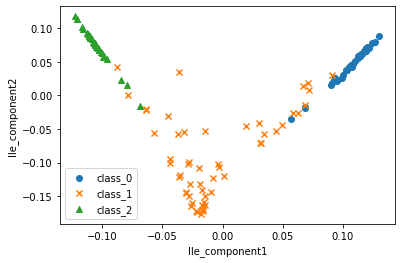

In [26]:
# LLE 시각화
df = x_tn_lle_df
markers = ['o','x','^']

for i, mark in enumerate(markers):
    x_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    x1 = x_i['lle_comp1']
    x2 = x_i['lle_comp2']
    plt.scatter(x1,x2,marker=mark,label=target_i)

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

In [27]:
# LLE 적용 후 랜덤 포레스트 학습 및 예측
clf_rf = RandomForestClassifier(max_depth = 2, random_state = 0)

clf_rf.fit(x_tn_lle, y_tn)                                        # 설정된 모형에 LLE가 적용된 트레이닝 데이터를 넣고 적합
pred_rf_lle = clf_rf.predict(x_te_lle)                            # 적합된 모형을 이용해 예측값을 구함

In [28]:
# LLE 적용 후 정확도
accuracy_lle = accuracy_score(y_te, pred_rf_lle)
print(accuracy_lle)

0.9333333333333333
